# <font color='#80BCBD'>Tras los Pasos del Clima y los Taxis: Un Viaje de Datos
__Estudio sobre Viajes en Taxi y su Relación con el Clima en Chicago__

>Este estudio analiza la relación entre los viajes en taxi y las condiciones climáticas en la ciudad de Chicago. Se examina cómo factores como la lluvia afectan la duración de los viajes desde el distrito central de negocios de Chicago, conocido como el Loop, hasta el Aeropuerto Internacional O'Hare. Además, se investiga cuáles son las empresas de taxis más importantes en términos de cantidad de viajes, brindando una visión integral del transporte público en la ciudad.
>
>A través de un análisis exploratorio de datos, se identifican los 10 barrios más importantes en términos de finalización de viajes de taxi, así como las 10 empresas de taxis más prominentes en Chicago. Además, se prueba una hipótesis relacionada con la duración de los viajes en días lluviosos versus días sin lluvia, proporcionando información valiosa para planificar viajes y entender cómo las condiciones climáticas impactan en la movilidad urbana.
>
>Este estudio combina datos sobre viajes en taxi, condiciones climáticas y duración de los viajes para ofrecer una comprensión integral de la dinámica del transporte en Chicago. Los resultados proporcionan información útil tanto para los residentes de la ciudad como para los planificadores urbanos y las empresas de transporte público.
    
    
## <font color='#80BCBD'>Contenido<a id='back'></a>
* [Datos](#intro)
    * [1.1 Importar librerias](#1.1)
    * [1.2 Cargar datos](#1.2)
* [Preparar los datos](#2)
    * [2.1 Descripción de los datos](2.1)
    * [2.2 Observaciones del análisis exploratorio](#2.2)
    * [2.3 Verificar valores duplicados y duplicados implícitos](#2.3)
* [Presentación de los datos](#3)
    * [3.1 Los 10 principales barrios en término de finalizacion de viajes](#3.1)
    * [3.2 Gráfico de barras para las 10 principales empresas de taxis y número de viajes](#3.2)
* [Prueba de Hipótesis](#4)
    * [4.1 Análisis exploratorio de los datos](#4.1)
    * [4.2 Comentarios del análisis exploratorio](#4.2)
    * [4.3 Corregir datos](#4.3)
    * [4.4 Diagrama de caja weather_conditions](#4.4)
    * [4.5 Prueba Levene](#4.5)
    * [4.6 Prueba de hipótesis](#4.6)
* [Conclusiones](#end)

## Parte 1
- 1.1 Importar librerias.
- 1.2 Cargar los datos

### Importar las librerías <a id='1.1'></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as stats
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levene

### Cargar datos <a id='1.2'></a>

[Volver a Contenidos](#back)

Cualidades de los DataFrames

taxi: 
- `company_name`: nombre de la empresa de taxis
- `trips_amount`: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

chicago:
- `dropoff_location_name`: barrios de Chicago donde finalizaron los viajes
- `average_trips`: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

loop_airport:
- `start_ts`: fecha y hora de recogida
- `weather_conditions`: condiciones climáticas en el momento en el que comenzó el viaje
- `duration_seconds`: duración del viaje en segundos

In [2]:
taxi = pd.read_csv("moved_project_sql_result_01.csv")
chicago = pd.read_csv("moved_project_sql_result_04.csv")
loop_airport = pd.read_csv("moved_project_sql_result_07.csv")

##  <font color='#40A2E3'>Preparar los datos<a id='2'></a>
<font color='#000000'>
    
>- 2.1 Análisis exploratorio de los DataFrames
>- 2.2 Observaciones del analisis exploratorio
>- 2.3 Verificar valores duplicados y dupliados implicitos

###  <font color='#40A2E3'> Análisis exploratorio de los DataFrames <a id='2.1'></a>
[Volver a Contenidos](#back)

In [3]:
taxi.info(show_counts =True)
taxi.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
chicago.info(show_counts =True)
chicago.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


#  <font color='#40A2E3'> Observaciones exploratorio<a id='2.2'></a>
 <font color='#40A2E3'>__Comentario:__
    
     

Los datos proporcionados en los DataFrames `taxi` y `chicago` están en buenas condiciones para ser analizados. No se observan valores ausentes en ninguno de los DataFrames y los tipos de datos de las columnas parecen corresponder con la información proporcionada. Además, los nombres de las columnas están en minúsculas y en formato snake_case, lo que facilita la legibilidad del código. En consecuencia, no es necesario realizar ningún ajuste adicional en los datos antes de proceder con el análisis exploratorio.
     
     
     

### <font color='#40A2E3'> Verifiar valores duplicados y duplicados implícitos<a id='2.3'></a>
[Volver a Contenidos](#back)

In [5]:
print("Filas totalmente duplicadas en DataFrame taxi:")
print(taxi.duplicated().value_counts())
print()
print("Filas totalmente duplicadas en DataFrame chicago:")
print(chicago.duplicated().value_counts())

Filas totalmente duplicadas en DataFrame taxi:
False    64
Name: count, dtype: int64

Filas totalmente duplicadas en DataFrame chicago:
False    94
Name: count, dtype: int64


__Comentario:__

No existen filas duplicadas en ambos DataFrames, es posible continuar.

## <font color='#0D9276'> Presentación de los datos<a id='3'></a>
>- 3.1 Los 10 principales barrios en términos de finalización de viajes.
>- 3.2 Gráfico de barras para las 10 principales empresas de taxis y número de viajes.


### <font color='#0D9276'> Los 10 principales barrios en términos de finalización de viajes<a id='3.1'></a>
[Volver a Contenidos](#back)

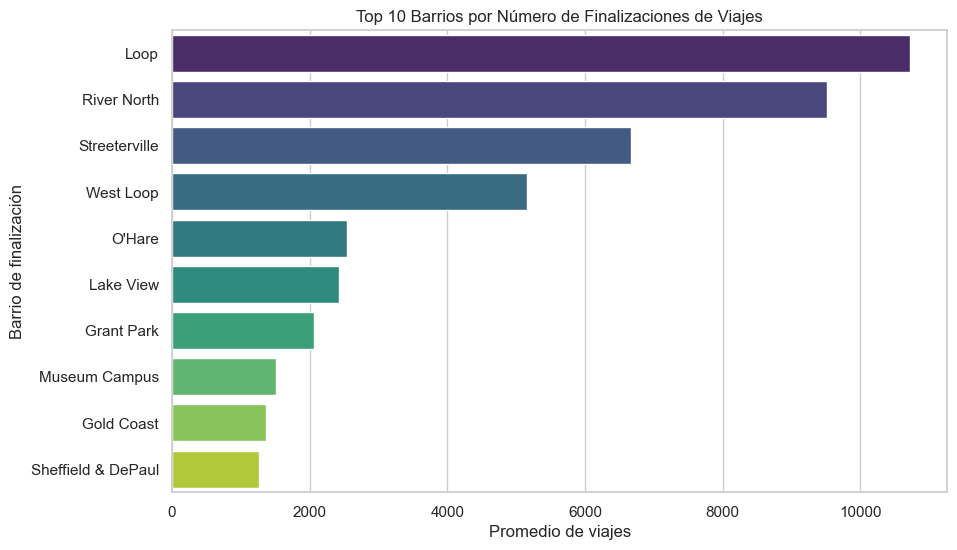

In [6]:
# Identificar los 10 principales barrios en términos de finalización de viajes
top_10_barrios = chicago.nlargest(10, 'average_trips')

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras horizontal para los 10 principales barrios en términos de finalización de viajes
plt.figure(figsize=(10, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=top_10_barrios, palette='viridis')
plt.xlabel('Promedio de viajes')
plt.ylabel('Barrio de finalización')
plt.title('Top 10 Barrios por Número de Finalizaciones de Viajes')
plt.show()

<font color='#0D9276'> __Comentarios:__

>- Loop: Con un promedio de más de 10,000 viajes, el barrio Loop emerge como el más popular en términos de finalizaciones de viajes. Esto sugiere una alta actividad comercial o turística en esta área.
>- River North y Streeterville: Estos barrios también muestran una alta cantidad de viajes, lo que sugiere que son destinos populares para los pasajeros.
>- O'Hare: Aunque O'Hare tiene una cantidad considerablemente menor de viajes en comparación con los tres primeros barrios, sigue siendo un importante centro de transporte con más de 2,500 viajes en promedio.

### <font color='#0D9276'> Gráfico de barras para las 10 principales empresas de taxis y número de viajes: <a id='3.2'></a>
    
[Volver a Contenidos](#back)

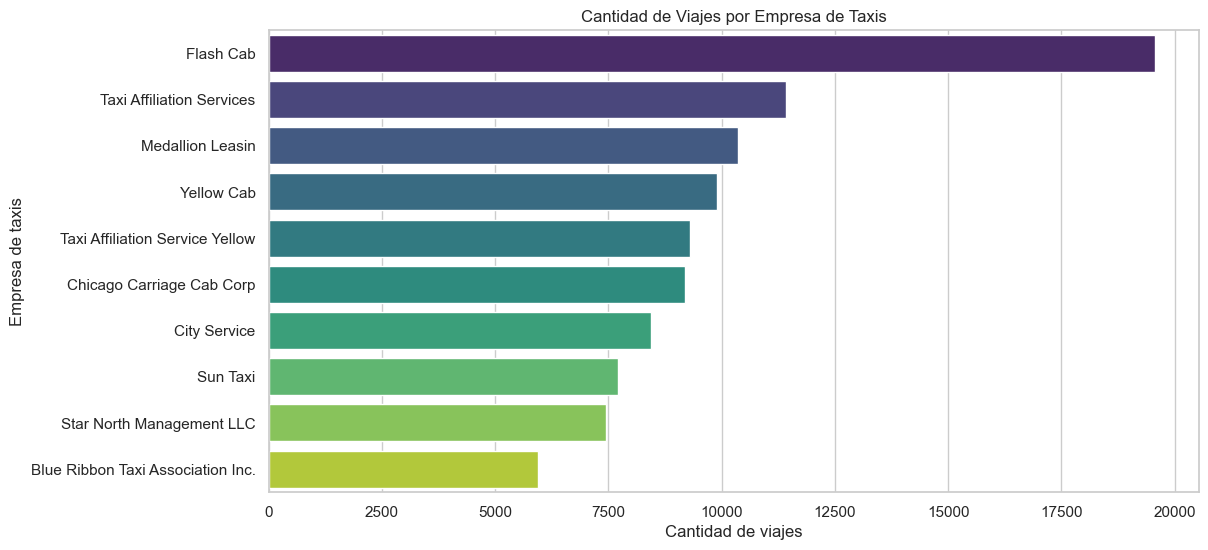

In [7]:
# Establecer el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras para visualizar la cantidad de viajes por empresa de taxis
plt.figure(figsize=(12, 6))
sns.barplot(x='trips_amount', y='company_name', data=taxi.head(10), palette='viridis')
plt.xlabel('Cantidad de viajes')
plt.ylabel('Empresa de taxis')
plt.title('Cantidad de Viajes por Empresa de Taxis')
plt.show()

<font color='#0D9276'>__Comentarios:__

> - Flash Cab: Encabeza la lista con un número significativamente mayor de viajes en comparación con otras empresas de taxis. Esto sugiere una fuerte presencia y demanda de los servicios de Flash Cab en la ciudad.
> -Taxi Affiliation Services y Medallion Leasing: Siguen a Flash Cab con un número considerable de viajes, aunque están significativamente por debajo en términos de volumen en comparación con Flash Cab.
> -Yellow Cab: Aunque Yellow Cab es una de las principales empresas de taxis, ocupa el cuarto lugar en términos de número de viajes. Esto puede indicar una competencia intensa en el mercado de taxis de la ciudad.

## <font color='#7360DF'>__Comentarios Prueba de Hipótesis__<a id='4'></a>
>- 4.1 Análisis exploratorio de los datos 
>- 4.2 Comentarios del analisis exploratorio
>- 4.3 Corregir datos
>- 4.4 Diagrama de caja Weater_conditions
>- 4.5 Prueba Levene 
>- 4.6 Prueba de hipótesis

### <font color='#7360DF'> Análisis exploratorio de los datos <a id='4.1'></a>
[Volver a Contenidos](#back)

In [8]:
loop_airport.info(show_counts =True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


###  <font color='#7360DF'> Comentarios del analisis exploratorio<a id='4.2'></a>
<font color='#7360DF'>
    
> - No hay valores ausentes: Correcto, no hay necesidad de lidiar con valores ausentes en este DataFrame, lo que es una buena noticia y facilita nuestro análisis.
> - Columnas en minúsculas y en snake_case: La convención de nombres en minúsculas y snake_case es una buena práctica en Python, por lo que ya estamos en un buen camino.
> - __start_ts como tipo de objeto__: Convertir la columna start_ts a tipo datetime nos permitirá realizar operaciones de fecha y hora de manera más eficiente y precisa.

### <font color='#7360DF'> Corregir datos<a id='4.3'></a>
[Volver a Contenidos](#back)

In [9]:
# Convertir la columna 'start_ts' a tipo datetime
loop_airport['start_ts'] = pd.to_datetime(loop_airport['start_ts'])

# Verificar los tipos de datos después de la conversión
print(loop_airport.dtypes)

start_ts              datetime64[ns]
weather_conditions            object
duration_seconds             float64
dtype: object


### <font color='#7360DF'>Diagrama de caja weather_conditions  <a id='4.3'></a>
[Volver a Contenidos](#back)

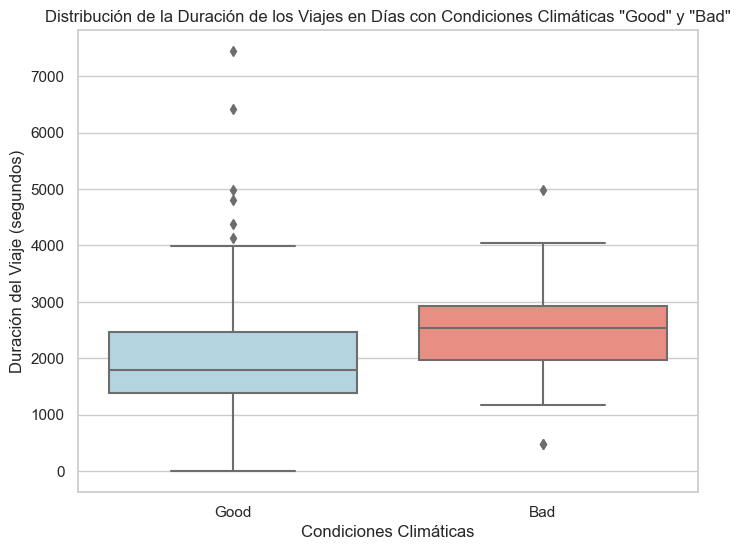

In [10]:
# Configurar el estilo y el tamaño de la figura
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Crear el boxplot
sns.boxplot(x='weather_conditions', y='duration_seconds', data=loop_airport, palette={"Good": "lightblue", "Bad": "salmon"})

# Añadir título y etiquetas de los ejes
plt.title('Distribución de la Duración de los Viajes en Días con Condiciones Climáticas "Good" y "Bad"')
plt.xlabel('Condiciones Climáticas')
plt.ylabel('Duración del Viaje (segundos)')

# Mostrar el gráfico
plt.show()


### <font color='#7360DF'>Prueba Levene <a id='4.5'></a>

><font color='#7360DF'>__Hipótesis nula (H0):__ <font color='#000000'>
>
>Las varianzas de los dos grupos son iguales. No hay diferencia significativa entre las medias de los dos grupos.
>
><font color='#7360DF'>__Hipótesis alternativa (H1):__ <font color='#000000'>
>
>Las varianzas de los dos grupos son diferentes. Hay una diferencia significativa entre las medias de los dos grupos.
>
> <font color='#7360DF'>__Comentario:__ <font color='#000000'>
>
>En el caso de la prueba t-test, se realiza después de confirmar que las varianzas son iguales (mediante la prueba de Levene) para comparar las medias de los grupos. Si las varianzas resultan ser diferentes, se puede aplicar una versión modificada de la prueba t-test que tenga en cuenta esta diferencia.

[Volver a Contenidos](#back)

In [11]:
# Dividir el DataFrame en dos grupos: días lluviosos y días no lluviosos
dias_lluviosos = loop_airport[loop_airport['weather_conditions'] == 'Bad']
dias_no_lluviosos = loop_airport[loop_airport['weather_conditions'] == 'Good']


# Obtener las duraciones de los viajes en días lluviosos y días no lluviosos
duracion_dias_lluviosos = dias_lluviosos['duration_seconds']
duracion_dias_no_lluviosos = dias_no_lluviosos['duration_seconds']

# Realizar el test de Levene
statistic, p_value = levene(duracion_dias_lluviosos, duracion_dias_no_lluviosos)

# Imprimir los resultados
print("Estadístico de prueba de Levene:", statistic)
print("Valor p del test de Levene:", p_value)
print()

# Interpretar los resultados
alfa = 0.05
if p_value < alfa:
    print("Rechazamos la hipótesis nula: \nHay una diferencia significativa en las varianzas de las duraciones de los viajes entre días lluviosos y no lluviosos.")
else:
    print("No podemos rechazar la hipótesis nula: \nNo hay suficiente evidencia para afirmar que hay una diferencia significativa en las varianzas de las duraciones de los viajes entre días lluviosos y no lluviosos.")


Estadístico de prueba de Levene: 0.38853489683656073
Valor p del test de Levene: 0.5332038671974493

No podemos rechazar la hipótesis nula: 
No hay suficiente evidencia para afirmar que hay una diferencia significativa en las varianzas de las duraciones de los viajes entre días lluviosos y no lluviosos.


### <font color='#7360DF'> Prueba de Hipótesis<a id='4.6'></a>

    
> <font color='#7360DF'> __Hipótesis Nula (H0):__ <font color='#000000'>La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es la misma en días lluviosos y no lluviosos.
>
> <font color='#7360DF'>__Hipótesis Alternativa (H1):__<font color='#000000'> La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es diferente en días lluviosos y no lluviosos.
>    
> Para probar estas hipótesis, utilizaremos un test de hipótesis de dos muestras para comparar las duraciones promedio de los viajes en días lluviosos y no lluviosos. <font color='#7360DF'>__Utilizaremos un nivel de significancia (alfa) de 0.05.__ <font color='#000000'>
>
> __El proceso de prueba de hipótesis implicará los siguientes pasos:__
>
> 1. Dividir el DataFrame loop_airport en dos grupos: viajes en días lluviosos y viajes en días no lluviosos.
>
> 2. Calcular la duración promedio de los viajes en cada grupo.
> 
> 3. Realizar un test de hipótesis de dos muestras para determinar si hay una diferencia significativa en las duraciones promedio de los viajes entre los dos grupos.
>
> 4. Interpretar los resultados del test de hipótesis y tomar una decisión sobre si rechazar o no la hipótesis nula.
>
>
> Para realizar el test de hipótesis, podemos usar un test t de Student para muestras independientes, que nos proporcionará una prueba estadística y un valor p asociado que nos permitirá tomar una decisión sobre la hipótesis nula. Si el valor p es menor que nuestro nivel de significancia (alfa), rechazaremos la hipótesis nula y concluiremos que hay una diferencia significativa en las duraciones promedio de los viajes entre los días lluviosos y no lluviosos.

[Volver a Contenidos](#back)

In [12]:
#  Retomar  días_lluviosos       del punto 4.5 
#           dias_no_lluviosos            


# Calcular la duración promedio de los viajes en cada grupo
promedio_duracion_lluviosos = dias_lluviosos['duration_seconds'].mean()
promedio_duracion_no_lluviosos = dias_no_lluviosos['duration_seconds'].mean()

# Realizar el test de hipótesis de dos muestras
test_estadistico, valor_p = stats.ttest_ind(dias_lluviosos['duration_seconds'], dias_no_lluviosos['duration_seconds'])

# Imprimir los resultados
print("Duración promedio de los viajes en días lluviosos:", promedio_duracion_lluviosos)
print("Duración promedio de los viajes en días no lluviosos:", promedio_duracion_no_lluviosos)
print("Valor p del test de hipótesis:", valor_p)
print()
# Interpretar los resultados
alfa = 0.05
if valor_p < alfa:
    print("Rechazamos la hipótesis nula: \nHay una diferencia significativa en la duración promedio de los viajes entre días lluviosos y no lluviosos.")
else:
    print("No podemos rechazar la hipótesis nula: \nNo hay suficiente evidencia para afirmar que hay una diferencia significativa en la duración promedio de los viajes entre días lluviosos y no lluviosos.")


Duración promedio de los viajes en días lluviosos: 2427.2055555555557
Duración promedio de los viajes en días no lluviosos: 1999.6756756756756
Valor p del test de hipótesis: 6.517970327099473e-12

Rechazamos la hipótesis nula: 
Hay una diferencia significativa en la duración promedio de los viajes entre días lluviosos y no lluviosos.


<font color='#7360DF'>__Comentarios:__
<font color='#7360DF'>
> Al rechazar la hipótesis nula, confirmamos que hay una diferencia significativa en la duración promedio de los viajes entre días lluviosos y no lluviosos. Esto sugiere que las condiciones climáticas, específicamente la lluvia, tienen un impacto notable en la duración de los viajes en esta ruta. Los resultados respaldan la idea de que los días lluviosos pueden generar condiciones de tráfico más desafiantes o conducir a una menor eficiencia en el transporte, lo que resulta en viajes más largos desde el Loop hasta el aeropuerto.

## <font color='#FFA41B'>Conclusiones<a id='end'></a>

[Volver a Contenidos](#back)
    

<font color='#0D9276'>__Los 10 Barrios Más Importantes:__
>- <font color='#0D9276'>__Loop:__ <font color='#000000'> Con un promedio de aproximadamente 10,727 viajes, es el barrio más importante en términos de finalización de viajes.
>> Loop: Con una superficie total de aproximadamente 4.09 km² y una población de alrededor de 16,388 personas en 2010 (y probablemente más en 2024), el Loop es un barrio densamente poblado con una alta concentración de actividades comerciales, culturales y de transporte. Su alta densidad de población y su ubicación céntrica lo convierten en un importante destino para los viajes de taxi, como lo sugiere su alta cantidad de viajes de finalización.
>- <font color='#0D9276'>__River North:__ <font color='#000000'>Sigue de cerca al Loop con un promedio de alrededor de 9,524 viajes.
>> River North: Tiene una población de alrededor de 37,000 personas. River North es conocido por ser un barrio de lujo con una gran cantidad de galerías de arte, restaurantes, bares y tiendas. Su población significativamente mayor que la del Loop indica que es una zona residencial más grande, lo que puede explicar su alta cantidad de viajes de finalización
>- <font color='#0D9276'>__Streeterville:__<font color='#000000'> Con un promedio de alrededor de 6,665 viajes.
>> Streeterville: Con una población de aproximadamente 34,562 residentes, Streeterville es un barrio con una cantidad considerable de residentes, lo que puede influir en la cantidad de viajes de taxi que se originan o terminan en esta área.
>- <font color='#0D9276'>__West Loop:__ <font color='#000000'>Con un promedio de alrededor de 5,164 viajes.
>> West Loop: Tiene una población de alrededor de 27,507 personas. Aunque es un barrio más pequeño en términos de población en comparación con Streeterville, su ubicación céntrica y su crecimiento como centro de negocios y residencial pueden generar una alta demanda de servicios de transporte.
>- <font color='#0D9276'>__O'Hare:__ <font color='#000000'>Con un promedio de alrededor de 2,547 viajes.
>> O'Hare: Con una superficie total de aproximadamente 13.34 millas cuadradas (34.55 km²) y una población de alrededor de 13,418 residentes, O'Hare es conocido principalmente por ser el hogar del Aeropuerto Internacional O'Hare. Aunque la población residente es relativamente baja en comparación con otros barrios, la actividad del aeropuerto genera una gran cantidad de tráfico de taxis.
>- <font color='#0D9276'>__Lake View:__ <font color='#000000'>Con un promedio de alrededor de 2,421 viajes.
>> Lake View: Con una superficie total de aproximadamente 3.13 millas cuadradas (8.10 km²) y una población de alrededor de 103,050 residentes, Lake View es un barrio densamente poblado con una alta demanda de servicios de transporte debido a su densidad de población.
>- <font color='#0D9276'>__Grant Park:__ <font color='#000000'>Con un promedio de alrededor de 2,069 viajes.
>> Grant Park: Aunque Grant Park es una villa ubicada en el condado de Kankakee, Illinois, no es el mismo que el Grant Park ubicado en Chicago. El Grant Park en Chicago es un importante parque público y no un barrio residencial. Por lo tanto, la información proporcionada sobre su población y densidad poblacional no es relevante para nuestro análisis de los barrios de Chicago.
>- <font color='#0D9276'>__Museum Campus:__ <font color='#000000'>Con un promedio de alrededor de 1,510 viajes.
>- <font color='#0D9276'>__Gold Coast:__ <font color='#000000'>Con un promedio de alrededor de 1,364 viajes.
>- <font color='#0D9276'>__Sheffield & DePaul:__ <font color='#000000'>Con un promedio de alrededor de 1,260 viajes.
> ***
>
> <font color='#0D9276'>__Aspectos clave:__
>- __Actividades Comerciales y Turísticas:__ <font color='#000000'>El Loop es conocido como el distrito central de negocios de Chicago y alberga numerosas oficinas, comercios, instituciones culturales y atracciones turísticas, como el Millennium Park, el Art Institute of Chicago y la Magnificent Mile. Estas atracciones generan una alta demanda de transporte, lo que puede resultar en una mayor cantidad de viajes de taxi.
>- <font color='#0D9276'>__Centro de Transporte:__ <font color='#000000'>El Loop es un importante centro de transporte en Chicago, con estaciones de tren, paradas de autobús y acceso a las principales autopistas. Esto facilita la movilidad dentro del barrio y hacia y desde otras áreas de la ciudad, lo que puede aumentar la cantidad de viajes de finalización.
>- <font color='#0D9276'>__Negocios y Ocupaciones:__ <font color='#000000'>El Loop alberga una gran cantidad de empresas, oficinas gubernamentales, universidades y centros médicos, lo que puede generar una mayor necesidad de transporte para los trabajadores y visitantes.
>- <font color='#0D9276'>__Distribución Geográfica de las Paradas de Taxi:__ <font color='#000000'>Es posible que la distribución de paradas de taxi o la ubicación de empresas de taxi en el Loop sea más favorable para la finalización de viajes en comparación con River North.
>

***

<font color='#0D9276'>__Las 10 empresas más importantes__

Al analizar las 10 empresas de taxis más importantes en función del número de viajes, es probable que varios factores contribuyan al éxito relativo de cada empresa:

>- __Reputación y Servicio al Cliente:__ <font color='#000000'>Empresas como Flash Cab y Taxi Affiliation Services pueden tener una reputación establecida y una base de clientes leales debido a la calidad de su servicio y su enfoque en la satisfacción del cliente. La consistencia en la calidad del servicio puede generar una mayor demanda y, por lo tanto, más viajes.
>- <font color='#0D9276'>__Cobertura de Servicio:__ <font color='#000000'>Empresas que tienen una amplia cobertura de servicio y una presencia visible en áreas clave de la ciudad pueden atraer a más clientes. Esto puede incluir la disponibilidad de taxis en áreas de alta actividad, como el Loop o zonas turísticas.
>- <font color='#0D9276'>__Distribución de Paradas de Taxis:__ <font color='#000000'>La ubicación estratégica de las paradas de taxis de una empresa puede influir en su éxito. Aquellas con una mayor cantidad de paradas en áreas de alta demanda pueden capturar más clientes y realizar más viajes.
>- <font color='#0D9276'>__Precio y Tarifas Competitivas:__ <font color='#000000'>Empresas que ofrecen tarifas competitivas o descuentos pueden atraer a más clientes, especialmente en un mercado donde los precios son un factor importante para los usuarios.
>- <font color='#0D9276'>__Innovación Tecnológica:__ <font color='#000000'>Las empresas que adoptan tecnologías modernas, como aplicaciones móviles para reservar t- axis o servicios de seguimiento en tiempo real, pueden ofrecer una experiencia de usuario mejorada, lo que puede resultar en una mayor preferencia por parte de los clientes.
>- <font color='#0D9276'>__Demanda de Población y Actividades Comerciales:__<font color='#000000'> La demanda de servicios de taxi puede estar influenciada por la densidad de población, la actividad comercial y la presencia de turistas en determinadas áreas de la ciudad. Las empresas que operan en áreas con alta demanda de transporte tendrán más oportunidades de realizar viajes.

***

<font color='#7360DF'>__Prueba de Hipótesis__

>- __Impacto del Clima en la Duración de los Viajes:__ <font color='#000000'>La diferencia significativa en la duración promedio de los viajes entre días lluviosos y no lluviosos indica que las condiciones climáticas tienen un efecto notable en el tiempo que tardan los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Los días lluviosos tienden a generar condiciones de tráfico más congestionadas y desafiantes, lo que resulta en una duración de viaje más larga en comparación con los días sin lluvia.
>- <font color='#7360DF'>__Planificación de Viajes y Logística:__ <font color='#000000'>Esta información puede ser invaluable para planificar y gestionar la logística de los viajes desde el Loop hasta el aeropuerto, especialmente para aquellos que necesitan llegar a tiempo para vuelos u otros compromisos importantes. Conocer la tendencia de que los días lluviosos estén asociados con tiempos de viaje más largos puede permitir a las personas anticipar y planificar en consecuencia, ya sea ajustando sus horarios de salida o considerando rutas alternativas.
>- <font color='#7360DF'>__Impacto en la Eficiencia y Costos del Transporte:__ <font color='#000000'>Para empresas y organizaciones que dependen del transporte desde el Loop hasta el aeropuerto, comprender la variabilidad en la duración de los viajes según las condiciones climáticas puede tener implicaciones importantes en términos de eficiencia operativa y costos. Es posible que sea necesario asignar más tiempo de viaje en días lluviosos para garantizar la puntualidad, lo que podría afectar la programación y los recursos disponibles.
>- <font color='#7360DF'>__Seguridad y Confort del Pasajero:__ <font color='#000000'>Además de la eficiencia y la puntualidad, el conocimiento de cómo afecta el clima a la duración de los viajes puede ser crucial para garantizar la seguridad y el confort de los pasajeros. Los conductores pueden necesitar adaptar su conducción y estrategias de ruta en función de las condiciones climáticas para garantizar un viaje seguro y cómodo para los pasajeros.
    
    
[Volver a Contenidos](#back)